# <center> Speech Emotion Recognition - Part 1 </center>

# Table of Contents:
* ## [Introduction](#introduction)

* ## [Loading the Data:](#load)
    - ### [Ravdess](#r)
    - ### [Crema](#c)
    - ### [Tess](#t)
    - ### [Savee](#s)
    - ### [Datasets Concatenations](#concat)

* ## [Exploratory Data Analysis](#eda)

* ## [Signal Processing](#signal)

* ## [Data Augmentation:](#aug)
    - ### [Exploring the Techniques:](#tech)
        - #### [Original](#original)
        - #### [Noise](#noise)
        - #### [Stretch](#stretch)
        - #### [Pitch](#pitch)
        - #### [Stretch & Pitch](#sp)
    - ### [Implementing the Techniques](#implement)
* ## [Feature Extraction](#feature)

## Introduction: <a class="anchor" id="introduction"></a>

<b> This is part 1 of the notebook for the speech emotion recognition project.

### Importing necessarry libraries

In [4]:
# data loading / processing
import os as os
import re
import librosa
import math
import numpy as np
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

# progress bar
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.simplefilter("ignore", UserWarning)

## Loading the Data <a class="anchor" id="load"></a>

In [5]:
Crema = 'data/Crema'
Savee = 'data/Savee'
Tess = 'data/Tess'
Ravdess = 'data/Ravdess/audio_speech_actors_01-24'

### Ravdess <a class="anchor" id="r"></a>

In [6]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

In [7]:
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)
Ravdess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df

,Emotion,Path
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...
...,...,...
1435,surprise,data/Ravdess/audio_speech_actors_01-24\Actor_2...
1436,surprise,data/Ravdess/audio_speech_actors_01-24\Actor_2...
1437,surprise,data/Ravdess/audio_speech_actors_01-24\Actor_2...
1438,surprise,data/Ravdess/audio_speech_actors_01-24\Actor_2...


### Crema <a class="anchor" id="c"></a>

In [8]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + "/" + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + "/" + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + "/" + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + "/" + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + "/" + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + "/" + wav))
    else:
        emotion_df.append(("unknown", Crema + "/" + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df

,Emotion,Path
0,angry,data/Crema/1001_DFA_ANG_XX.wav
1,disgust,data/Crema/1001_DFA_DIS_XX.wav
2,fear,data/Crema/1001_DFA_FEA_XX.wav
3,happy,data/Crema/1001_DFA_HAP_XX.wav
4,neutral,data/Crema/1001_DFA_NEU_XX.wav
...,...,...
7437,disgust,data/Crema/1091_WSI_DIS_XX.wav
7438,fear,data/Crema/1091_WSI_FEA_XX.wav
7439,happy,data/Crema/1091_WSI_HAP_XX.wav
7440,neutral,data/Crema/1091_WSI_NEU_XX.wav


### Tess <a class="anchor" id="t"></a>

In [9]:
tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    if dir == '.DS_Store':
        print('---------------- ')
        continue
    for wav in os.listdir(os.path.join(Tess, dir)):
        info = wav.partition(".wav")[0].split("_")
        emo = info[2]
        if emo == "ps":
            emotion_df.append(("surprise", os.path.join(Tess, dir, wav)))
        else:
            emotion_df.append((emo, os.path.join(Tess, dir, wav)))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Tess_df

,Emotion,Path
0,angry,data/Tess\OAF_angry\OAF_back_angry.wav
1,angry,data/Tess\OAF_angry\OAF_bar_angry.wav
2,angry,data/Tess\OAF_angry\OAF_base_angry.wav
3,angry,data/Tess\OAF_angry\OAF_bath_angry.wav
4,angry,data/Tess\OAF_angry\OAF_bean_angry.wav
...,...,...
2795,sad,data/Tess\YAF_sad\YAF_witch_sad.wav
2796,sad,data/Tess\YAF_sad\YAF_yearn_sad.wav
2797,sad,data/Tess\YAF_sad\YAF_yes_sad.wav
2798,sad,data/Tess\YAF_sad\YAF_young_sad.wav


### Savee <a class="anchor" id="s"></a>

In [10]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + "/" + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + "/" + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + "/" + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + "/" + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + "/" + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + "/" + wav))
    else:
        emotion_df.append(("surprise", Savee + "/" + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df

,Emotion,Path
0,angry,data/Savee/DC_a01.wav
1,angry,data/Savee/DC_a02.wav
2,angry,data/Savee/DC_a03.wav
3,angry,data/Savee/DC_a04.wav
4,angry,data/Savee/DC_a05.wav
...,...,...
475,surprise,data/Savee/KL_su11.wav
476,surprise,data/Savee/KL_su12.wav
477,surprise,data/Savee/KL_su13.wav
478,surprise,data/Savee/KL_su14.wav


### Datasets Concatenation <a class="anchor" id="concat"></a>

In [12]:
df = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0,ignore_index=True)
df

,Emotion,Path
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...
...,...,...
12157,surprise,data/Savee/KL_su11.wav
12158,surprise,data/Savee/KL_su12.wav
12159,surprise,data/Savee/KL_su13.wav
12160,surprise,data/Savee/KL_su14.wav


## Exploratory Data Analysis <a class="anchor" id="eda"></a>

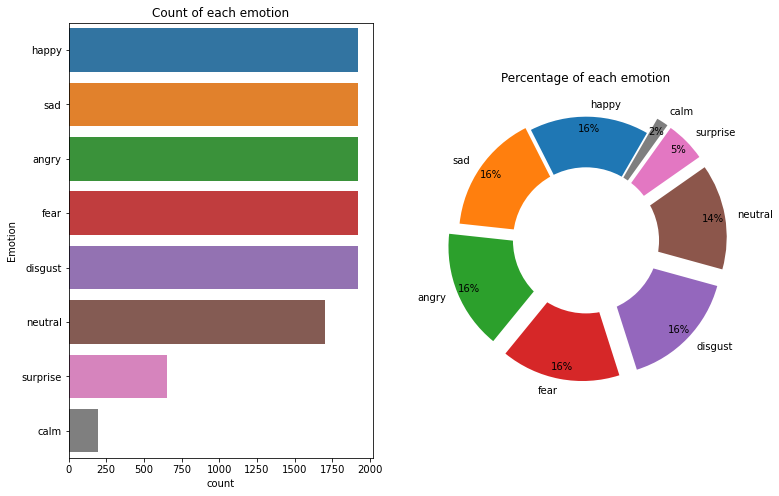

In [13]:
col = 'Emotion'
grouped_df = pd.DataFrame(df[col].value_counts())
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])
labels = list(grouped_df.index)
sizes = grouped_df[col]
ax2.pie(sizes[:10],  explode=explode[:10], startangle=60, labels=labels[:10],autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y = col, data = df, ax=ax1, order = labels)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

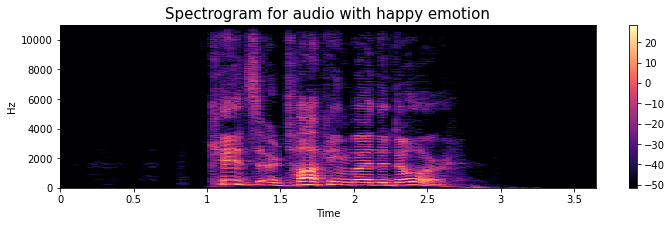

In [18]:
emotion = 'happy'
path = np.array(df['Path'][df['Emotion']==emotion])[5]
signal, sr = librosa.load(path)
# create_spectrogram(data, sr, emotion)
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(12, 3))
plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

## Signal Processing <a class="anchor" id="signal"></a>

In [26]:
custom_df = df.copy()
custom_df["Signal"] = None
custom_df["Sampling Rate"] = None

for row, path in tqdm(enumerate(custom_df['Path'])):
    custom_df["Signal"][row] , custom_df["Sampling Rate"][row] = librosa.load(path,
                                                                              duration = 2.5,
                                                                              offset = 0.6)

12162it [06:02, 33.51it/s]


In [27]:
custom_df

,Emotion,Path,Signal,Sampling Rate
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[1.2793837e-08, -1.2744653e-08, 1.1805135e-08,...",22050
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
...,...,...,...,...
12157,surprise,data/Savee/KL_su11.wav,"[0.0061094956, 0.008446325, 0.006752816, 0.006...",22050
12158,surprise,data/Savee/KL_su12.wav,"[-0.0057331417, -0.006540063, -0.003146428, -0...",22050
12159,surprise,data/Savee/KL_su13.wav,"[0.00077652873, 0.00101778, 0.0004007397, 1.43...",22050
12160,surprise,data/Savee/KL_su14.wav,"[0.009271556, 0.0062165675, -0.004982226, -0.0...",22050


In [29]:
# custom_df.to_pickle("signals.pkl")

In [ ]:
# custom_df = pd.read_pickle("Signals.pkl")

## Data Augmentation <a class="anchor" id="aug"></a>

In [30]:
def noise(signal):
    return signal+0.035*np.random.uniform()*np.amax(signal)*np.random.normal(size=signal.shape[0])

def stretch(signal, rate=0.8):
    return librosa.effects.time_stretch(signal, rate)

def pitch(signal, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(signal, sampling_rate, pitch_factor)

### Exploring the Techniques <a class="anchor" id="tech"></a>

#### Original <a class="anchor" id="og"></a>

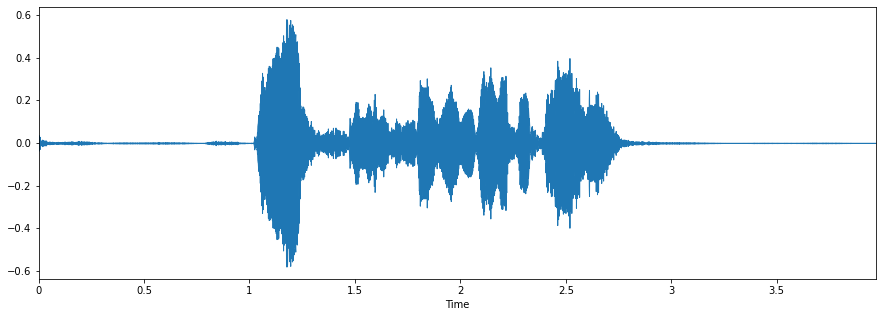

In [178]:
signal, sr = librosa.load(custom_df["Path"][42])
plt.figure(figsize=(15, 5))
librosa.display.waveplot(signal, sr=sr)

ipd.Audio(signal, rate=sr)

#### Noise <a class="anchor" id="noise"></a>

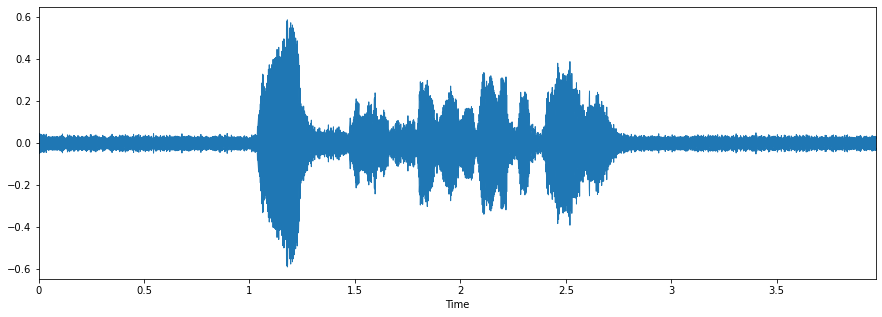

In [41]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(noise(signal), sr=sr)
ipd.Audio(noise(signal), rate=sr)

#### Stretch <a class="anchor" id="stretch"></a>

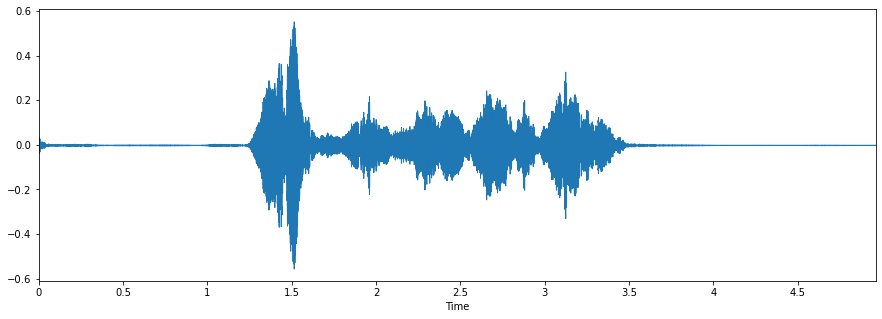

In [83]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(stretch(signal), sr=sr)
ipd.Audio(stretch(signal), rate=sr)

#### Pitch <a class="anchor" id="pitch"></a>

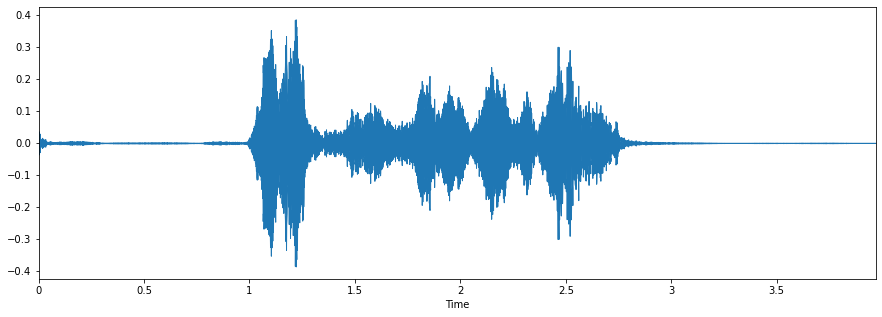

In [82]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(pitch(signal, sr), sr=sr)
ipd.Audio(pitch(signal, sr), rate=sr)

#### Stretch & Pitch <a class="anchor" id="sp"></a>

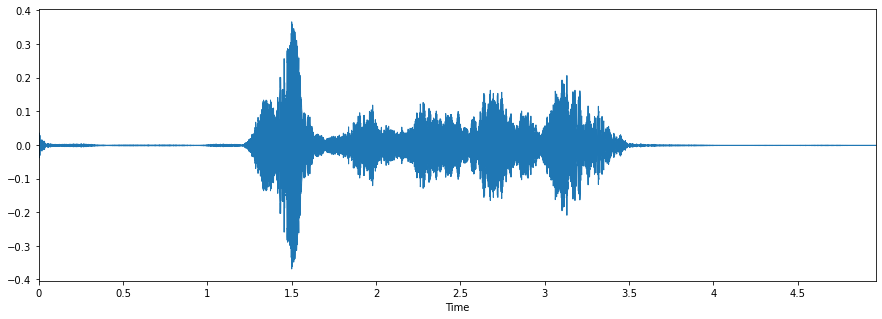

In [106]:
temp = stretch(signal)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(pitch(temp, sr), sr=sr)
ipd.Audio(pitch(temp, sr), rate=sr)

<b>For data augmentation, we'll implement:
- Noise (injecting noise on all audio signals)
- Stretch & Pitch (changing pitch of strteched audio signals)</b>

### Implementing the Techniques <a class="anchor" id="implement"></a>

In [105]:
stretch_df = custom_df.copy()
noise_df = custom_df.copy()
pitch_stretch_df = custom_df.copy()

In [99]:
noise_df["Signal"] = custom_df["Signal"].progress_apply(noise)

100%|███████████████████████████████████████████████████████████████████████████| 12162/12162 [00:15<00:00, 770.37it/s]


In [98]:
stretch_df["Signal"] = custom_df["Signal"].progress_apply(stretch)

100%|████████████████████████████████████████████████████████████████████████████| 12162/12162 [04:41<00:00, 43.19it/s]


In [107]:
pitch_stretch_df["Signal"] = stretch_df.progress_apply(lambda x : pitch(x['Signal'], 22050), axis = 1)

100%|████████████████████████████████████████████████████████████████████████████| 12162/12162 [11:13<00:00, 18.05it/s]


In [108]:
noise_df

,Emotion,Path,Signal,Sampling Rate
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[1.2793837e-08, -1.2744653e-08, 1.1805135e-08,...",22050
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
...,...,...,...,...
12157,surprise,data/Savee/KL_su11.wav,"[0.0061094956, 0.008446325, 0.006752816, 0.006...",22050
12158,surprise,data/Savee/KL_su12.wav,"[-0.0057331417, -0.006540063, -0.003146428, -0...",22050
12159,surprise,data/Savee/KL_su13.wav,"[0.00077652873, 0.00101778, 0.0004007397, 1.43...",22050
12160,surprise,data/Savee/KL_su14.wav,"[0.009271556, 0.0062165675, -0.004982226, -0.0...",22050


In [109]:
pitch_stretch_df

,Emotion,Path,Signal,Sampling Rate
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[1.5504608e-09, 6.7481043e-10, 7.602827e-10, -...",22050
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[-2.5226654e-09, -1.1568014e-09, -1.2469382e-0...",22050
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[1.846682e-09, -1.2167359e-09, 7.073794e-09, -...",22050
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[-1.9816193e-08, 2.3811904e-08, -2.6021265e-08...",22050
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[-1.2731018e-10, -2.5930413e-09, 4.0429176e-09...",22050
...,...,...,...,...
12157,surprise,data/Savee/KL_su11.wav,"[0.0060994737, 0.008426055, 0.00677084, 0.0068...",22050
12158,surprise,data/Savee/KL_su12.wav,"[-0.005803811, -0.006557814, -0.003097208, -0....",22050
12159,surprise,data/Savee/KL_su13.wav,"[0.0007858629, 0.0010214511, 0.00036459867, 7....",22050
12160,surprise,data/Savee/KL_su14.wav,"[0.009449332, 0.00616582, -0.0054153656, -0.01...",22050


In [110]:
aug_df = pd.concat([custom_df, noise_df, pitch_stretch_df], axis=0,ignore_index=True)
aug_df

,Emotion,Path,Signal,Sampling Rate
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[1.2793837e-08, -1.2744653e-08, 1.1805135e-08,...",22050
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
...,...,...,...,...
36481,surprise,data/Savee/KL_su11.wav,"[0.0060994737, 0.008426055, 0.00677084, 0.0068...",22050
36482,surprise,data/Savee/KL_su12.wav,"[-0.005803811, -0.006557814, -0.003097208, -0....",22050
36483,surprise,data/Savee/KL_su13.wav,"[0.0007858629, 0.0010214511, 0.00036459867, 7....",22050
36484,surprise,data/Savee/KL_su14.wav,"[0.009449332, 0.00616582, -0.0054153656, -0.01...",22050


In [111]:
# aug_df.to_pickle("augumented-data.pkl")

In [ ]:
# aug_df = pd.read_pickle("augumented-data.pkl")

## Feature Extraction <a class="anchor" id="feature"></a>

In [119]:
def extract_features(signal, sr = 22050):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(signal))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=signal).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=signal, sr=sr).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

In [135]:
features_df = aug_df.copy()

features_df["Features"] = aug_df["Signal"].progress_apply(extract_features)

100%|████████████████████████████████████████████████████████████████████████████| 36486/36486 [29:45<00:00, 20.44it/s]


In [137]:
features_df

,Emotion,Path,Signal,Sampling Rate,Features
0,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.30078125, 0.7064923048019409, 0.75685280561..."
1,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.2712718822337963, 0.6749655604362488, 0.723..."
2,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.3073685257523148, 0.7161778211593628, 0.761..."
3,neutral,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[1.2793837e-08, -1.2744653e-08, 1.1805135e-08,...",22050,"[0.29731354890046297, 0.7431291937828064, 0.75..."
4,calm,data/Ravdess/audio_speech_actors_01-24\Actor_0...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,"[0.24427625868055555, 0.611600935459137, 0.698..."
...,...,...,...,...,...
36481,surprise,data/Savee/KL_su11.wav,"[0.0060994737, 0.008426055, 0.00677084, 0.0068...",22050,"[0.0181304431352459, 0.46761587262153625, 0.52..."
36482,surprise,data/Savee/KL_su12.wav,"[-0.005803811, -0.006557814, -0.003097208, -0....",22050,"[0.04212782118055555, 0.5079319477081299, 0.60..."
36483,surprise,data/Savee/KL_su13.wav,"[0.0007858629, 0.0010214511, 0.00036459867, 7....",22050,"[0.03166142216435185, 0.4451121687889099, 0.47..."
36484,surprise,data/Savee/KL_su14.wav,"[0.009449332, 0.00616582, -0.0054153656, -0.01...",22050,"[0.051423249421296294, 0.4757654070854187, 0.5..."


In [140]:
features_df.to_pickle("features.pkl")

In [3]:
# features_df = pd.read_pickle("features.pkl")

In [4]:
features = pd.DataFrame(features_df['Features'].to_list())
features

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.300781,0.706492,0.756853,0.735217,0.731014,0.715155,0.667529,0.673754,0.722173,0.748969,...,3.818161e-06,4.319263e-06,3.298869e-06,2.153285e-06,2.286677e-06,5.131694e-06,8.065748e-06,5.375269e-06,2.270858e-06,1.642365e-07
1,0.271272,0.674966,0.723259,0.724594,0.681301,0.670643,0.674574,0.630036,0.680146,0.708276,...,7.139188e-06,6.998011e-06,7.050108e-06,6.670963e-06,6.999257e-06,1.217880e-05,9.449916e-06,8.465686e-06,2.638513e-06,1.788902e-07
2,0.307369,0.716178,0.761089,0.758008,0.758388,0.734855,0.649470,0.630941,0.680735,0.738601,...,1.097085e-05,1.281951e-05,1.290721e-05,1.525549e-05,1.986458e-05,2.776636e-05,4.780266e-05,2.483219e-05,8.083573e-06,6.468821e-07
3,0.297314,0.743129,0.754720,0.747343,0.733528,0.726183,0.682260,0.676388,0.701887,0.736036,...,1.624861e-05,1.986174e-05,1.858358e-05,2.485619e-05,8.028382e-05,4.014647e-05,3.653998e-05,3.107788e-05,1.029439e-05,6.636481e-07
4,0.244276,0.611601,0.698656,0.730102,0.686579,0.656195,0.657558,0.631722,0.669574,0.674671,...,6.417456e-06,5.811672e-06,4.467301e-06,1.176222e-05,6.051253e-06,3.856389e-06,4.652284e-06,4.236149e-06,1.549818e-06,1.118311e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36481,0.018130,0.467616,0.521791,0.525407,0.492337,0.496407,0.556227,0.515508,0.575827,0.665251,...,5.292033e-07,1.559122e-07,5.702100e-08,2.746430e-08,2.026328e-08,2.353200e-08,2.710068e-08,4.160622e-08,5.963533e-08,6.259223e-08
36482,0.042128,0.507932,0.601484,0.555101,0.479290,0.428419,0.509465,0.568993,0.564511,0.536956,...,2.022981e-07,5.720078e-08,2.862853e-08,1.437673e-08,9.489965e-09,9.819932e-09,1.176858e-08,1.827400e-08,2.628869e-08,2.876826e-08
36483,0.031661,0.445112,0.471160,0.491193,0.478887,0.451148,0.525682,0.632410,0.565541,0.500421,...,1.182934e-07,3.707684e-08,1.689016e-08,8.011726e-09,4.354761e-09,3.618042e-09,3.395549e-09,3.005059e-09,1.443821e-09,7.009023e-10
36484,0.051423,0.475765,0.537150,0.527179,0.535551,0.494147,0.528551,0.536035,0.541296,0.569161,...,6.001300e-07,2.072579e-07,5.972032e-08,2.550167e-08,9.190079e-09,1.000525e-08,1.420251e-08,2.871202e-08,5.326412e-08,6.452172e-08


### Now, we have our final dataframe which holds the emotions, signals and their extracted features as a pkl file.
### We'll move on to Part 2.